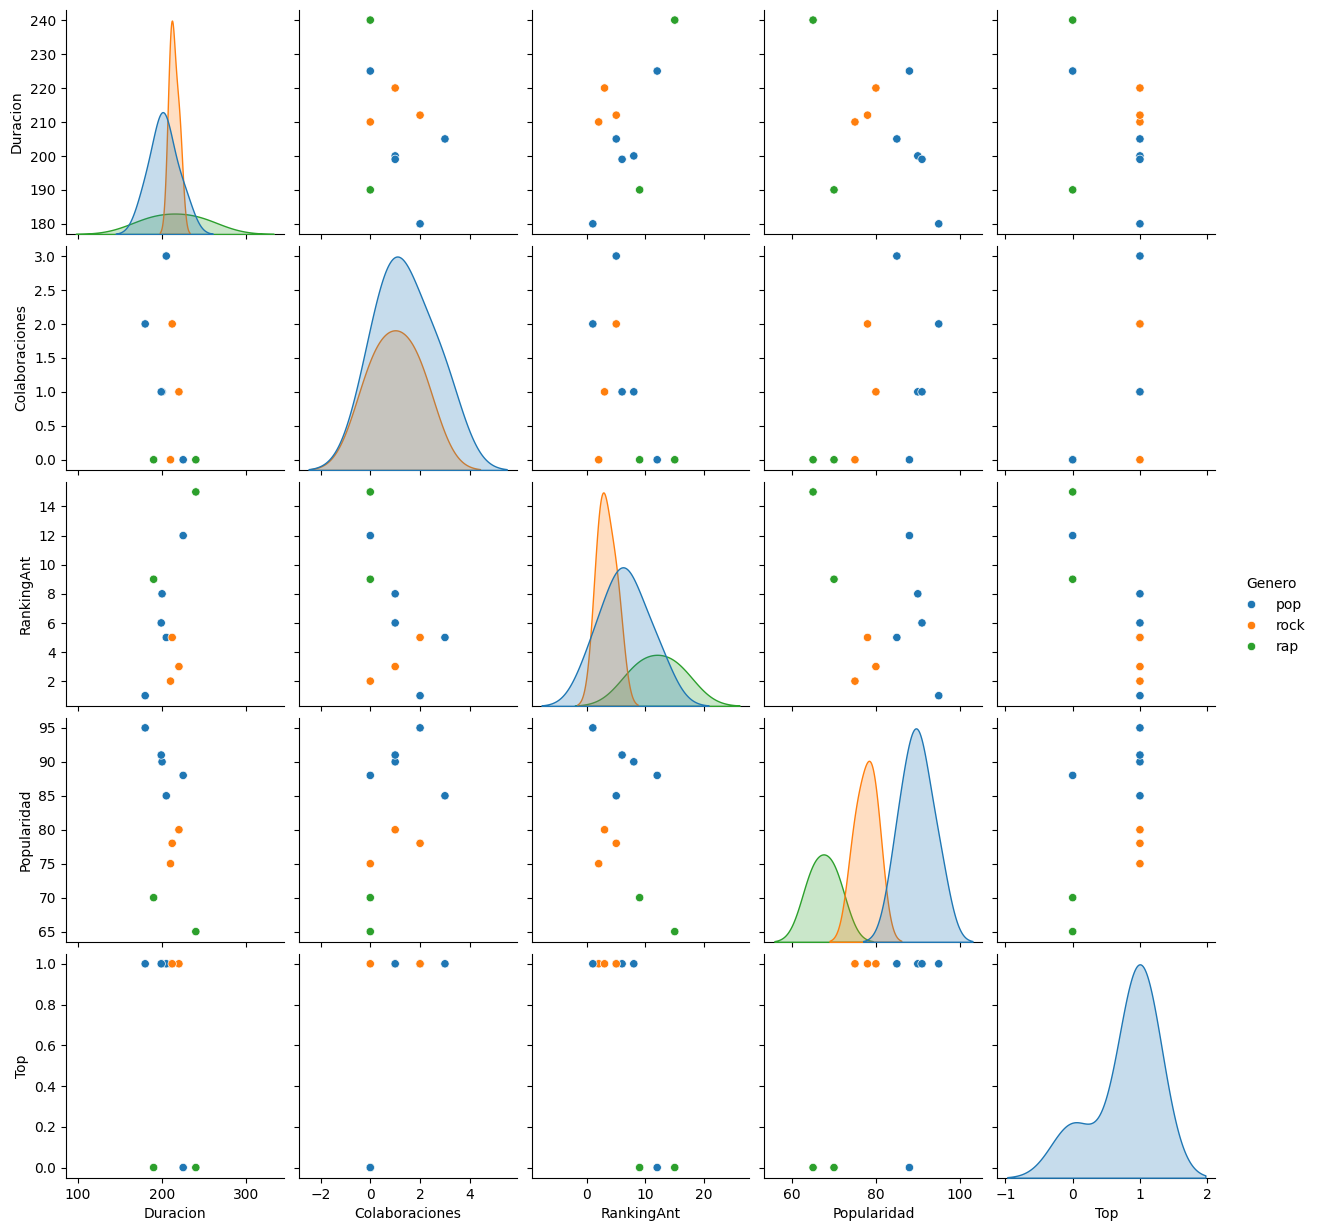

         Duracion  Colaboraciones  RankingAnt  Popularidad        Top
count   10.000000       10.000000   10.000000    10.000000  10.000000
mean   208.100000        1.000000    6.600000    81.700000   0.700000
std     17.444834        1.054093    4.452215     9.775821   0.483046
min    180.000000        0.000000    1.000000    65.000000   0.000000
25%    199.250000        0.000000    3.500000    75.750000   0.250000
50%    207.500000        1.000000    5.500000    82.500000   1.000000
75%    218.000000        1.750000    8.750000    89.500000   1.000000
max    240.000000        3.000000   15.000000    95.000000   1.000000


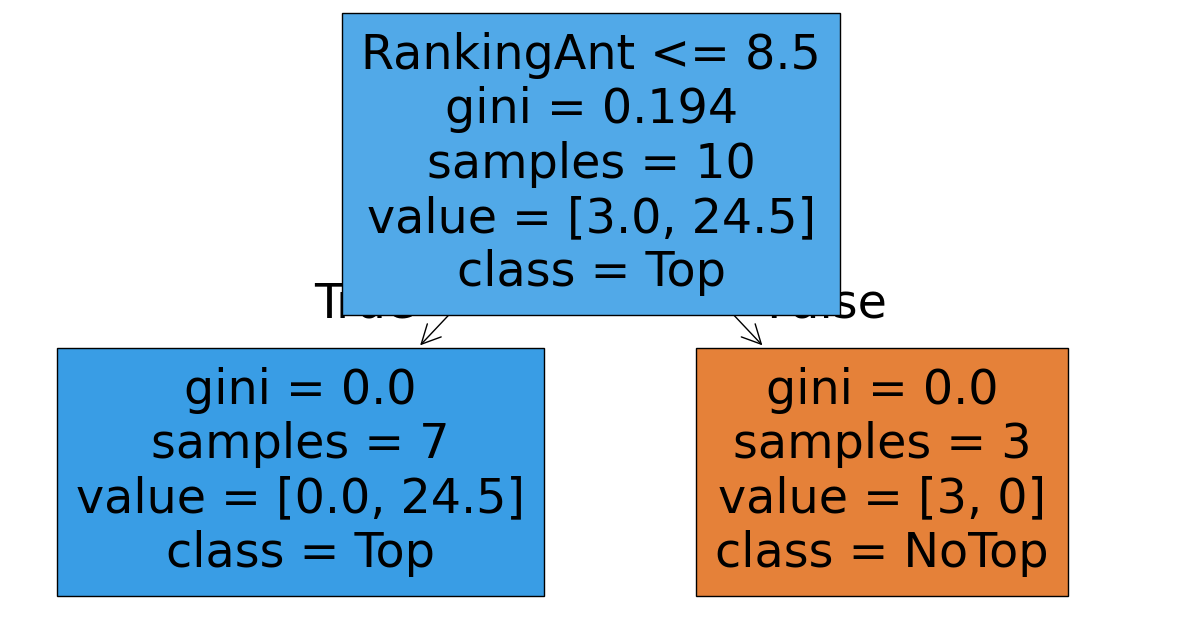

Importancia de cada variable:
RankingAnt        1.0
Duracion          0.0
Colaboraciones    0.0
Popularidad       0.0
Genero_pop        0.0
Genero_rap        0.0
Genero_rock       0.0
dtype: float64
¿Esta canción entra en el Top?: Sí
Probabilidad de NoTop: 0.0 | Probabilidad de Top: 1.0


In [1]:
# Árbol de decisión para música tipo Billboard

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset simulado de canciones y características
# Variables: duración (seg), género ('pop', 'rock', 'rap'), colaboraciones, ranking anterior, popularidad
data = [
    [200, 'pop', 1, 8, 90],
    [210, 'rock', 0, 2, 75],
    [180, 'pop', 2, 1, 95],
    [240, 'rap', 0, 15, 65],
    [205, 'pop', 3, 5, 85],
    [220, 'rock', 1, 3, 80],
    [190, 'rap', 0, 9, 70],
    [225, 'pop', 0, 12, 88],
    [199, 'pop', 1, 6, 91],
    [212, 'rock', 2, 5, 78],
]

target = [1, 1, 1, 0, 1, 1, 0, 0, 1, 1]  # 1 = Top, 0 = No Top

df = pd.DataFrame(data, columns=['Duracion', 'Genero', 'Colaboraciones', 'RankingAnt', 'Popularidad'])
df['Top'] = target

# Paso 1: Visualización y análisis previo
sns.pairplot(df, hue='Genero')
plt.show()
print(df.describe())

# Paso 2: Convertir variables categóricas
df_encoded = pd.get_dummies(df, columns=['Genero'])

# Paso 3: Separar variables (X) y objetivo (y)
X = df_encoded.drop(columns=['Top'])
y = df_encoded['Top']

# Paso 4: Entrenamiento del modelo
clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2,
                            min_samples_leaf=1, max_depth=4,
                            class_weight={1:3.5}, random_state=42)
clf.fit(X, y)

# Paso 5: Visualización del árbol de decisión
plt.figure(figsize=(15,8))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['NoTop', 'Top'])
plt.show()

# Paso 6: Análisis de importancia de variables
importancias = pd.Series(clf.feature_importances_, index=X.columns)
print("Importancia de cada variable:")
print(importancias.sort_values(ascending=False))

# Paso 7: Predicción de una canción manualmente
cancion_manual = pd.DataFrame([[210, 1, 2, 7, 80, 0, 0]], columns=list(X.columns))
prediccion = clf.predict(cancion_manual)
print("¿Esta canción entra en el Top?:", "Sí" if prediccion[0]==1 else "No")

# Paso 8: Mostrar probabilidades de pertenencia al Top
proba = clf.predict_proba(cancion_manual)
print("Probabilidad de NoTop:", proba[0][0], "| Probabilidad de Top:", proba[0][1])
